# HYPOTHESIS TESTING

## Importing Libraries

In [3]:
import pandas as pd

import numpy as np

import matplotlib.pyplot as plt

import seaborn as sns

/usr/local/lib/python3.6/dist-packages/statsmodels/tools/_testing.py:19: FutureWarning: pandas.util.testing is deprecated. Use the functions in the public API at pandas.testing instead.
  import pandas.util.testing as tm


In [4]:
expl = pd.read_excel('columns_explanation.xlsx')
expl

,Column name,explanation
0,Postal code,postal code of the area (in Paris)
1,date,date of the row aggregation
2,n_daily_data_points,number of daily data poinst that were availabl...
3,dayOfWeek,identifier of weekday (0: Monday -> 6: Sunday)
4,day_type,weekday or weekend
5,BlueCars_taken_sum,Number of bluecars taken that date in that area
6,BlueCars_returned_sum,Number of bluecars returned that date in that ...
7,Utilib_taken_sum,Number of Utilib taken that date in that area
8,Utilib_returned_sum,Number of Utilib returned that date in that area
9,Utilib_14_taken_sum,Number of Utilib 1.4 taken that date in that area


## Reading and Checking data

In [4]:
auto = pd.read_csv('http://bit.ly/DSCoreAutolibDataset')
auto.head()

,Postal code,date,n_daily_data_points,dayOfWeek,day_type,BlueCars_taken_sum,BlueCars_returned_sum,Utilib_taken_sum,Utilib_returned_sum,Utilib_14_taken_sum,Utilib_14_returned_sum,Slots_freed_sum,Slots_taken_sum
0,75001,1/1/2018,1440,0,weekday,110,103,3,2,10,9,22,20
1,75001,1/2/2018,1438,1,weekday,98,94,1,1,8,8,23,22
2,75001,1/3/2018,1439,2,weekday,138,139,0,0,2,2,27,27
3,75001,1/4/2018,1320,3,weekday,104,104,2,2,9,8,25,21
4,75001,1/5/2018,1440,4,weekday,114,117,3,3,6,6,18,20


In [17]:
auto.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 16085 entries, 0 to 16084
Data columns (total 13 columns):
 #   Column                  Non-Null Count  Dtype 
---  ------                  --------------  ----- 
 0   Postal code             16085 non-null  int64 
 1   date                    16085 non-null  object
 2   n_daily_data_points     16085 non-null  int64 
 3   dayOfWeek               16085 non-null  int64 
 4   day_type                16085 non-null  object
 5   BlueCars_taken_sum      16085 non-null  int64 
 6   BlueCars_returned_sum   16085 non-null  int64 
 7   Utilib_taken_sum        16085 non-null  int64 
 8   Utilib_returned_sum     16085 non-null  int64 
 9   Utilib_14_taken_sum     16085 non-null  int64 
 10  Utilib_14_returned_sum  16085 non-null  int64 
 11  Slots_freed_sum         16085 non-null  int64 
 12  Slots_taken_sum         16085 non-null  int64 
dtypes: int64(11), object(2)
memory usage: 1.6+ MB


In [6]:
auto['Postal code'].unique()

array([75001, 75002, 75003, 75004, 75005, 75006, 75007, 75008, 75009,
       75010, 75011, 75012, 75013, 75014, 75015, 75016, 75017, 75018,
       75019, 75020, 75112, 75116, 78000, 78140, 78150, 91330, 91370,
       91400, 92000, 92100, 92110, 92120, 92130, 92140, 92150, 92160,
       92170, 92190, 92200, 92210, 92220, 92230, 92240, 92250, 92260,
       92270, 92290, 92300, 92310, 92320, 92330, 92340, 92350, 92360,
       92370, 92380, 92390, 92400, 92410, 92420, 92500, 92600, 92700,
       92800, 93100, 93110, 93130, 93150, 93170, 93200, 93230, 93260,
       93300, 93310, 93350, 93360, 93370, 93390, 93400, 93440, 93500,
       93600, 93700, 93800, 94000, 94100, 94110, 94120, 94130, 94140,
       94150, 94160, 94220, 94230, 94300, 94340, 94410, 94450, 94500,
       94700, 94800, 95100, 95870, 95880])

In [0]:
auto[[75010]].count

In [7]:
auto.duplicated().any()

False

In [10]:
auto.isnull().any()

Postal code               False
date                      False
n_daily_data_points       False
dayOfWeek                 False
day_type                  False
BlueCars_taken_sum        False
BlueCars_returned_sum     False
Utilib_taken_sum          False
Utilib_returned_sum       False
Utilib_14_taken_sum       False
Utilib_14_returned_sum    False
Slots_freed_sum           False
Slots_taken_sum           False
dtype: bool

In [9]:
auto.shape

(16085, 13)

In [7]:
auto.describe()

,Postal code,n_daily_data_points,dayOfWeek,BlueCars_taken_sum,BlueCars_returned_sum,Utilib_taken_sum,Utilib_returned_sum,Utilib_14_taken_sum,Utilib_14_returned_sum,Slots_freed_sum,Slots_taken_sum
count,16085.000000,16085.000000,16085.000000,16085.000000,16085.000000,16085.000000,16085.000000,16085.000000,16085.000000,16085.000000,16085.000000
mean,88791.293876,1431.330619,2.969599,125.926951,125.912714,3.698290,3.699099,8.600560,8.599192,22.629033,22.629282
std,7647.342000,33.212050,2.008378,185.426579,185.501535,5.815058,5.824634,12.870098,12.868993,52.120263,52.146030
min,75001.000000,1174.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,91330.000000,1439.000000,1.000000,20.000000,20.000000,0.000000,0.000000,1.000000,1.000000,0.000000,0.000000
50%,92340.000000,1440.000000,3.000000,46.000000,46.000000,1.000000,1.000000,3.000000,3.000000,0.000000,0.000000
75%,93400.000000,1440.000000,5.000000,135.000000,135.000000,4.000000,4.000000,10.000000,10.000000,5.000000,5.000000
max,95880.000000,1440.000000,6.000000,1352.000000,1332.000000,54.000000,58.000000,100.000000,101.000000,360.000000,359.000000


## Exploring Data

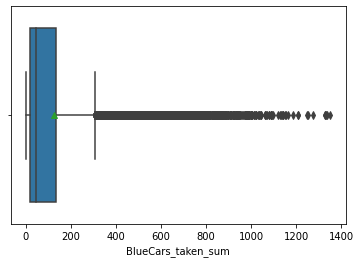

In [48]:
# checking for outliers
sns.boxplot(auto["BlueCars_taken_sum"], showmeans=True)

The above boxplot shows that there are outliers from 300 going forward.

In [52]:
auto1 = auto[['BlueCars_taken_sum', 'BlueCars_returned_sum', 'Utilib_taken_sum', 'Utilib_returned_sum','Utilib_14_taken_sum','Utilib_14_returned_sum']]

from scipy import stats

z = np.abs(stats.zscore(auto1))
print(z)


[[0.08589624 0.12352149 0.12008686 0.29171812 0.10873918 0.03114623]
 [0.15061389 0.17204012 0.46403223 0.46340806 0.04666462 0.04656234]
 [0.06511162 0.07055302 0.63600491 0.635098   0.51287601 0.51281378]
 ...
 [0.50116785 0.49010667 0.46403223 0.46340806 0.66827981 0.66823093]
 [0.61981688 0.6033168  0.12008686 0.22335169 0.51287601 0.51281378]
 [0.66835512 0.6680083  0.29205954 0.46340806 0.66827981 0.66823093]]


In [55]:
# confirming outliers have been removed
auto_c = auto[(z < 3).all(axis=1)]
print(f"Previous dataframe size : {auto1.shape[0]}")
print(f"New dataframe size: {auto_c.shape[0]}")

Previous dataframe size : 16085
New dataframe size: 15344


In [0]:
# exporting the data with no outliers
auto_c.to_csv("Autolib_without_Outliers.csv")

## Univariate Analysis

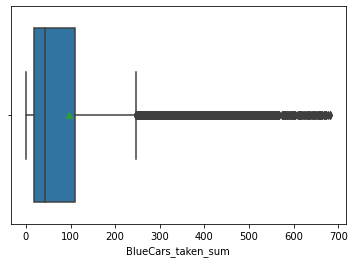

In [57]:
# Univariate analysis

sns.boxplot(auto_c["BlueCars_taken_sum"], showmeans=True)

As shown above, most of the outliers have been eliminated.


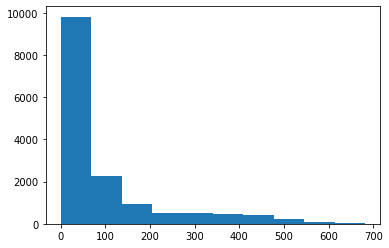

In [58]:
# checking for outliers and skewness
plt.hist(auto_c.BlueCars_taken_sum)
plt.show()

## Bivariate Analysis


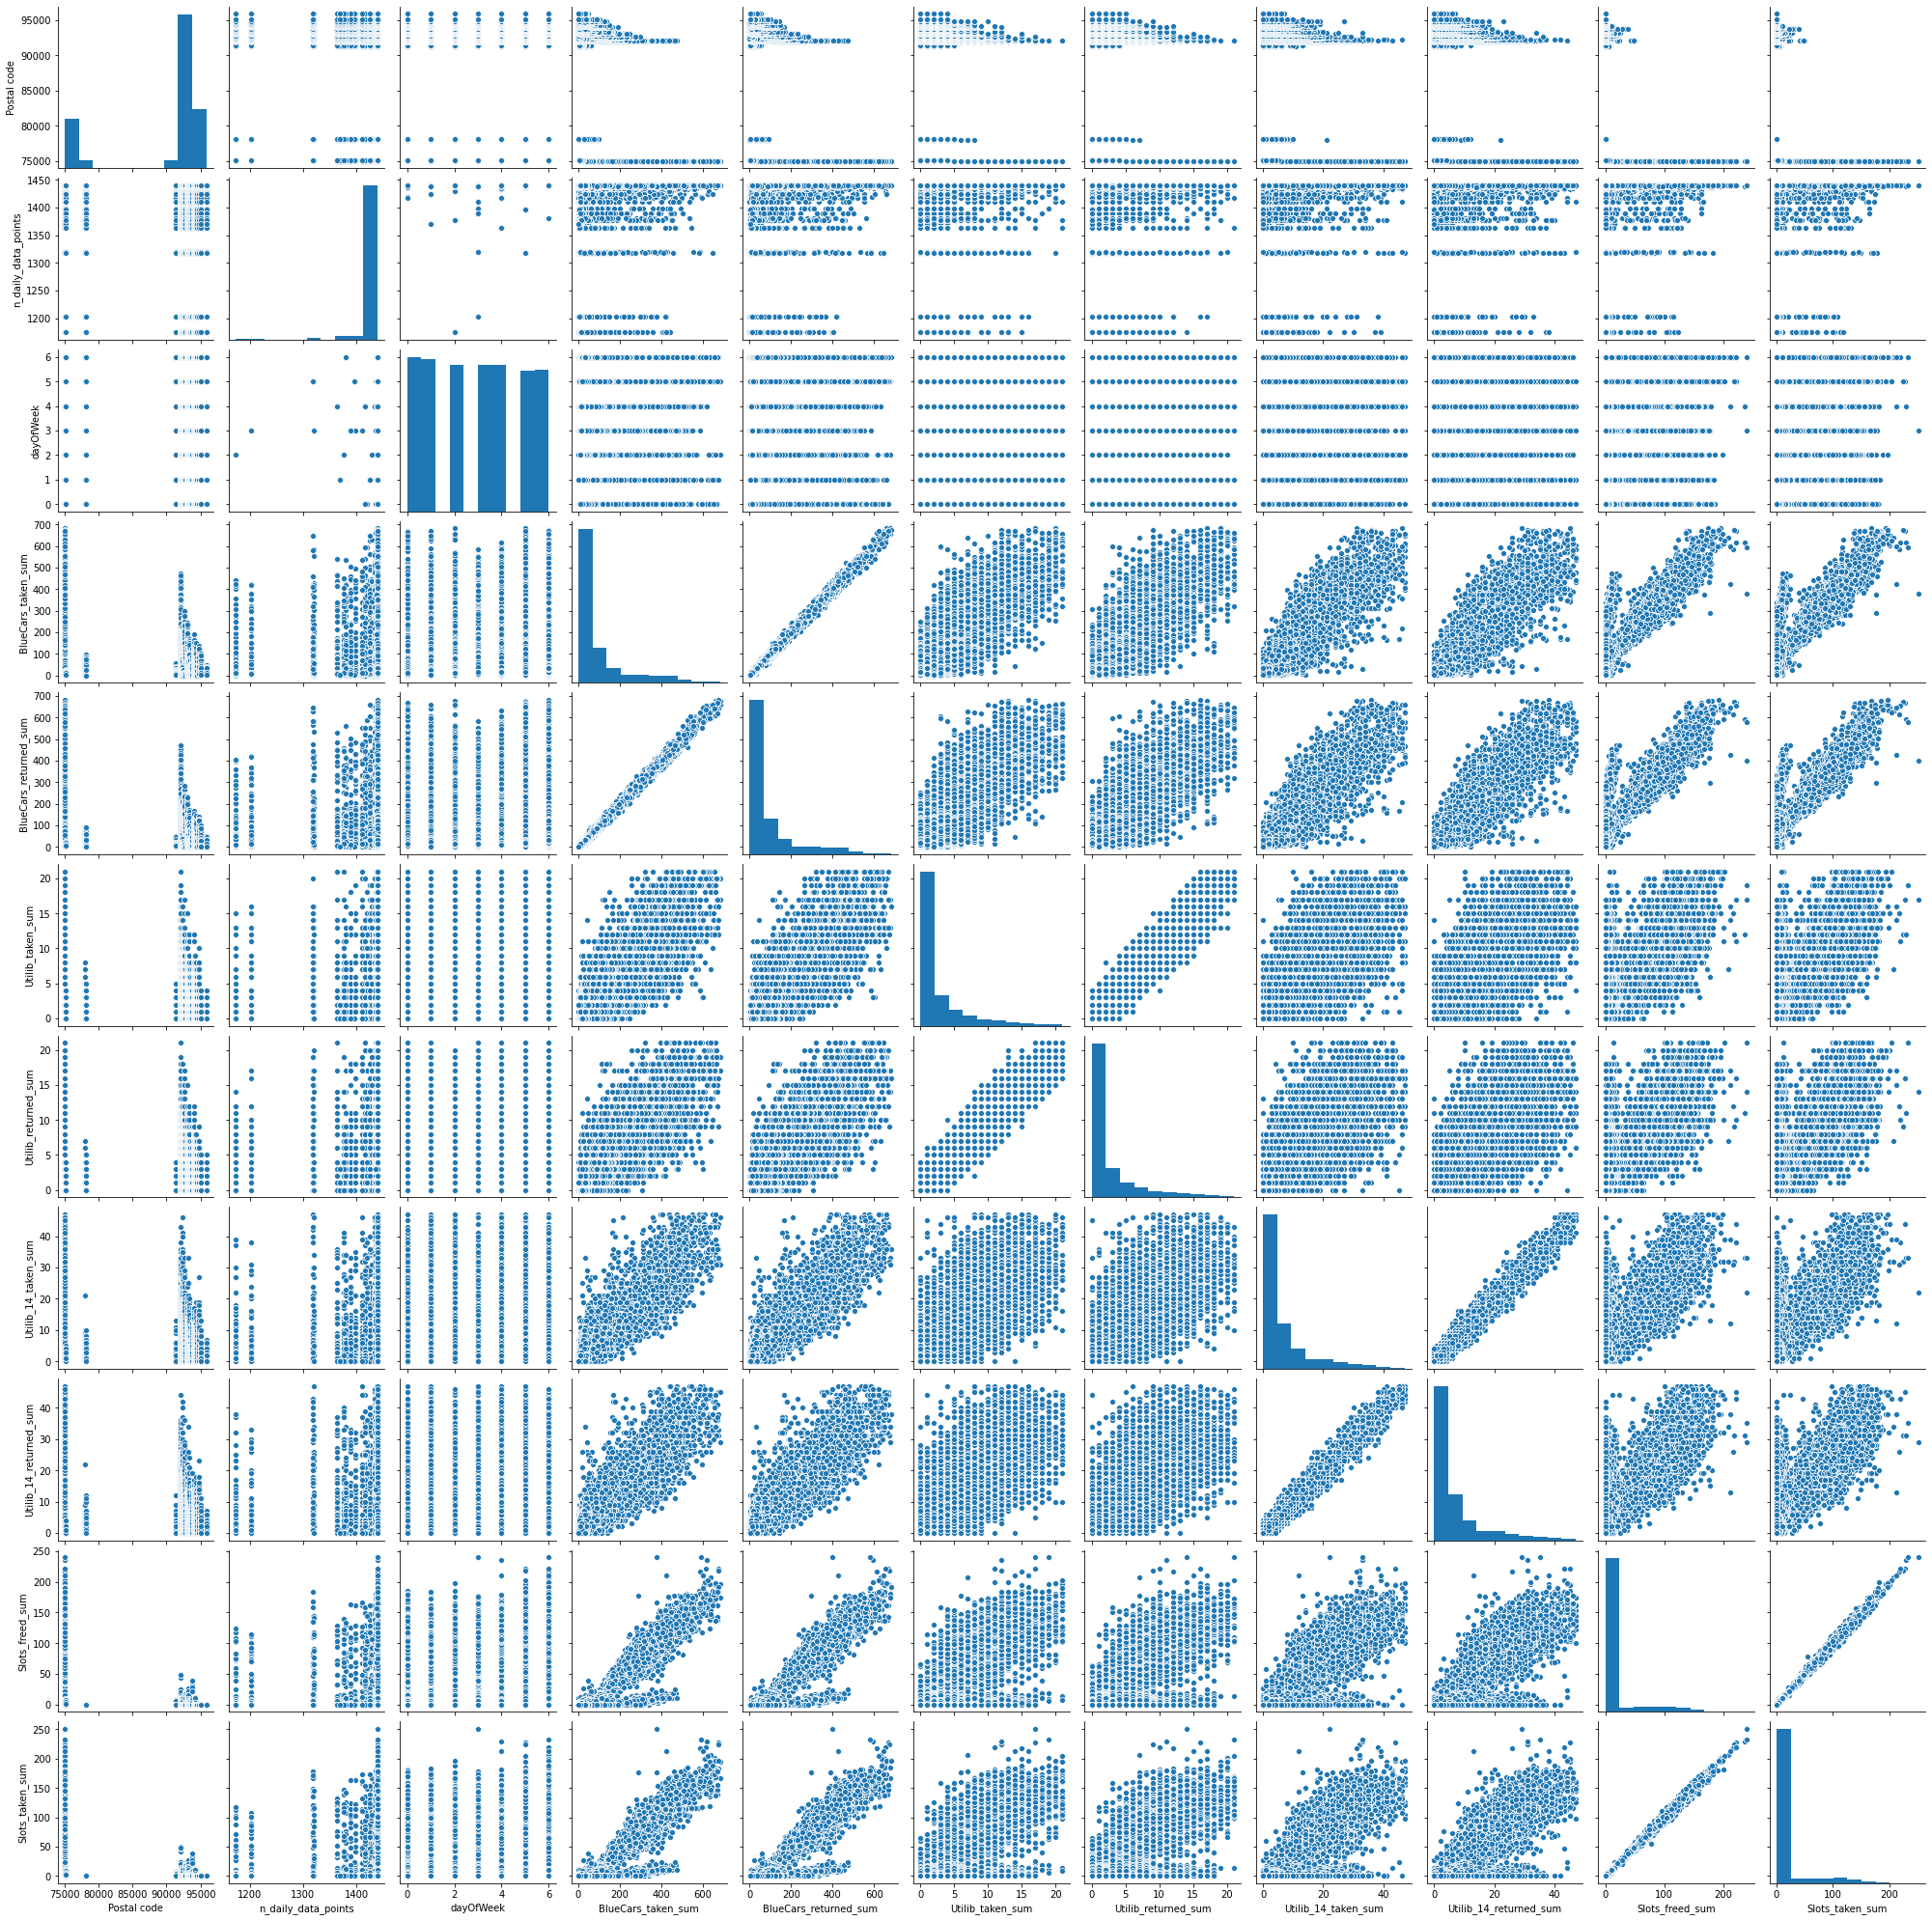

In [59]:
sns.pairplot(auto_c)
plt.show()

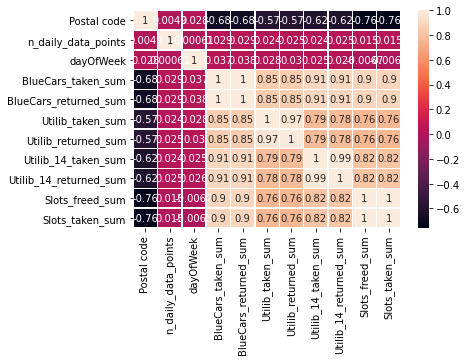

In [63]:
sns.heatmap(auto_c.corr(),annot=True, linewidths= .5, vmax= True)
plt.show()

## Hypothesis Calculations

In [46]:
blue = auto.groupby(['Postal code','day_type'])['BlueCars_taken_sum'].mean().sort_values(ascending=False)
blue.head(2)

Postal code  day_type
75015        weekend     1072.772727
75016        weekend      886.318182
Name: BlueCars_taken_sum, dtype: float64

In [65]:
# calculating the test statistic
z_score = (1072 - 886)/185

print(z_score)

1.0054054054054054


In [67]:
# Import norm from scipy.stats
from scipy.stats import norm

prob = norm.cdf(z_score)
print(f"The p-value is: {prob}")

if prob < 0.05:
  print("We reject the null hypothesis.")
else:
  print("We accept the null hypothesis.")

The p-value is: 0.8426491609483767
We accept the null hypothesis.
